<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/Stock_Price_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas_datareader as pdr

In [126]:
key="bb7b4332aa377da0ed1735af8f647fb3da7e9551"

In [127]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-127-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [128]:
df.to_csv('AAPL.csv')

In [129]:
import pandas as pd

In [130]:
df = pd.read_csv('AAPL.csv')

In [131]:
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-21 00:00:00+00:00,185.46,188.35,184.94,187.25,25711898,44.306152,44.996569,44.181924,44.733780,102847592,0.0,1.0
1,AAPL,2018-06-22 00:00:00+00:00,184.92,186.15,184.70,186.12,27200447,44.177146,44.470992,44.124589,44.463825,108801788,0.0,1.0
2,AAPL,2018-06-25 00:00:00+00:00,182.17,184.92,180.73,183.40,31663096,43.520175,44.177146,43.176161,43.814020,126652384,0.0,1.0
3,AAPL,2018-06-26 00:00:00+00:00,184.43,186.53,182.54,182.99,24569201,44.060086,44.561773,43.608567,43.716072,98276804,0.0,1.0
4,AAPL,2018-06-27 00:00:00+00:00,184.16,187.28,184.03,185.23,25285328,43.995583,44.740947,43.964526,44.251205,101141312,0.0,1.0


In [132]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-06-12 00:00:00+00:00,183.79,183.89,180.97,181.27,54754995,183.79,183.89,180.97,181.27,54754995,0.0,1.0
1252,AAPL,2023-06-13 00:00:00+00:00,183.31,184.15,182.44,182.80,54929129,183.31,184.15,182.44,182.80,54929129,0.0,1.0
1253,AAPL,2023-06-14 00:00:00+00:00,183.95,184.39,182.02,183.37,57462882,183.95,184.39,182.02,183.37,57462882,0.0,1.0
1254,AAPL,2023-06-15 00:00:00+00:00,186.01,186.52,183.78,183.96,65433166,186.01,186.52,183.78,183.96,65433166,0.0,1.0
1255,AAPL,2023-06-16 00:00:00+00:00,184.92,186.99,184.27,186.73,101256225,184.92,186.99,184.27,186.73,101256225,0.0,1.0


In [133]:
df1=df.reset_index()['close']

In [134]:
df1

0       185.46
1       184.92
2       182.17
3       184.43
4       184.16
         ...  
1251    183.79
1252    183.31
1253    183.95
1254    186.01
1255    184.92
Name: close, Length: 1256, dtype: float64

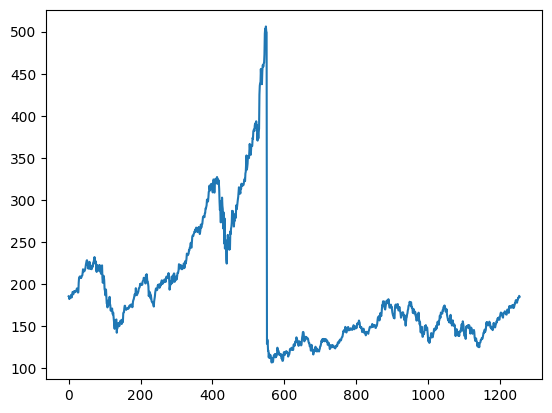

In [135]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [136]:
df2 = df.reset_index()['close']

In [137]:
import numpy as np

In [138]:
df1

0       185.46
1       184.92
2       182.17
3       184.43
4       184.16
         ...  
1251    183.79
1252    183.31
1253    183.95
1254    186.01
1255    184.92
Name: close, Length: 1256, dtype: float64

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [140]:
print(df1)


[[0.19691922]
 [0.19556669]
 [0.18867877]
 ...
 [0.19313713]
 [0.19829681]
 [0.19556669]]


In [141]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [142]:
training_size,test_size

(816, 440)

In [143]:
train_data

array([[1.96919224e-01],
       [1.95566688e-01],
       [1.88678773e-01],
       [1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],


In [144]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [145]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [146]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [147]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [148]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [149]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [150]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [151]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 11s 441ms/step - loss: 0.0457 - val_loss: 0.0035
Epoch 2/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0156 - val_loss: 0.0025
Epoch 3/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0119 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 3s 236ms/step - loss: 0.0098 - val_loss: 0.0019
Epoch 5/100
12/12 [==============================] - 4s 344ms/step - loss: 0.0089 - val_loss: 5.8297e-04
Epoch 6/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0086 - val_loss: 4.5438e-04
Epoch 7/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0070 - val_loss: 7.2248e-04
Epoch 8/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0063 - val_loss: 5.0979e-04
Epoch 9/100
12/12 [==============================] - 3s 300ms/step - loss: 0.0053 - val_loss: 3.0663e-04
Epoch 10/100
12/12 [==============================] - 3s 235ms/step - 

In [153]:
import tensorflow as tf

In [154]:
tf.__version__

'2.12.0'

In [155]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 39ms/step


In [156]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [157]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.52647878774104

In [158]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

155.04475223760542

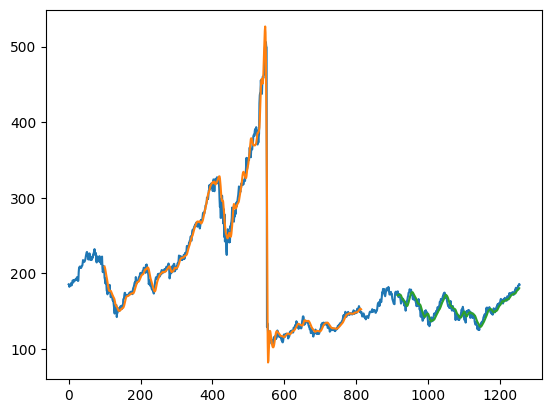

In [159]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [160]:
len(test_data)

440

In [161]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [162]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [163]:
temp_input

[0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.139060738885

In [164]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.18877055]
101
1 day input [0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046
 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 

In [165]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [166]:
import matplotlib.pyplot as plt

In [167]:
len(df1)

1256

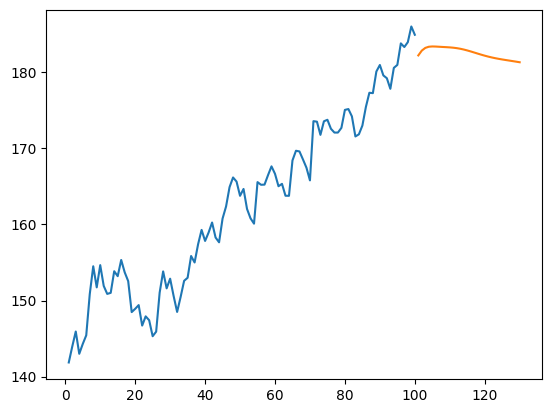

In [168]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

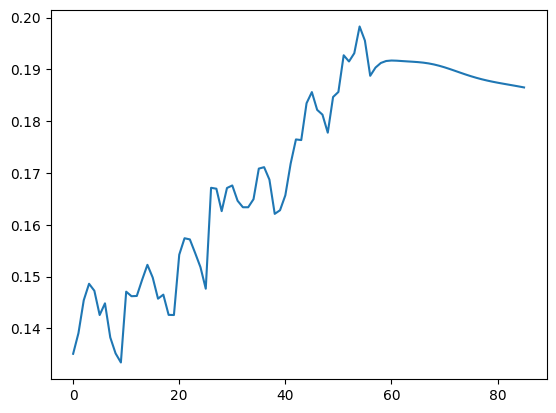

In [169]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [170]:
df3=scaler.inverse_transform(df3).tolist()


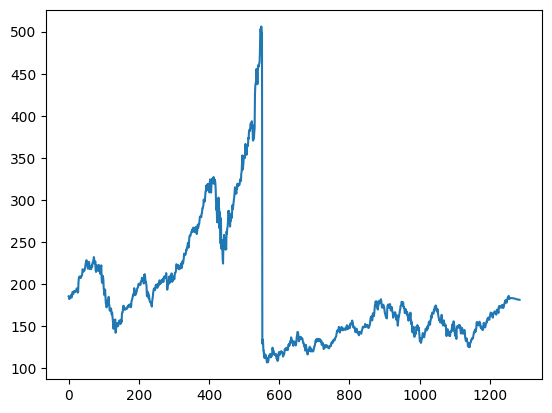

In [171]:
plt.plot(df3)


In [172]:
print("Thank you for this amaizing oportunity CODEX EARTH, obimo01@proton.me")

Thank you for this amaizing oportunity CODEX EARTH, obimo01@proton.me
